## Name - **D.M.S.S.DISSANAYAKE**
## Index Number - **190155L**

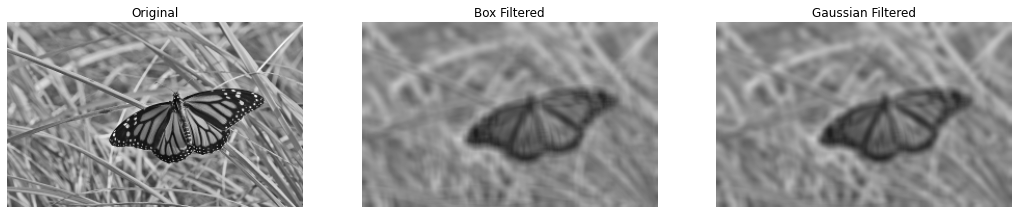

In [4]:
# Question 01

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_4).astype(np.float32)
assert img is not None

box_kernel = np.ones((9,9), float)/81
img_avg = cv.filter2D(img, -1, box_kernel)
sigma = 4
img_gaussian = cv.GaussianBlur(img, (9,9),sigma)

fig, ax = plt.subplots(1,3 , sharex = 'all' , sharey = 'all', figsize=(18,18))
ax[0].imshow(img,cmap= 'gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_avg,cmap= 'gray', vmin=0, vmax=255)
ax[1].set_title('Box Filtered')
ax[2].imshow(img_gaussian,cmap= 'gray', vmin=0, vmax=255)
ax[2].set_title('Gaussian Filtered')

for i in range(3):
        ax[i].axis('off')
plt.show()

(-5.499999999999998, 5.499999999999963, -5.499999999999998, 5.499999999999963)

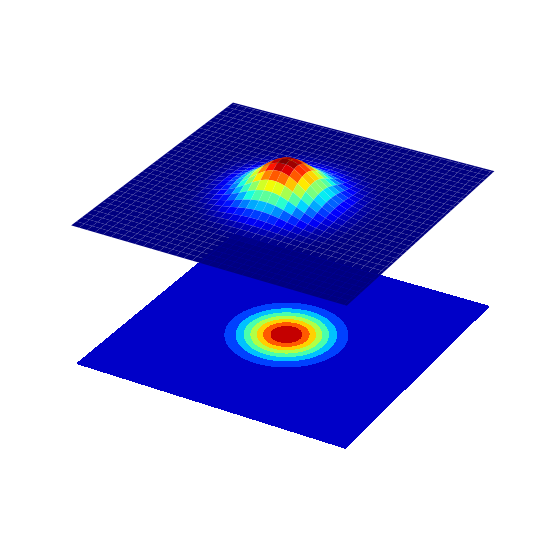

In [9]:
#  Question 02

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
sigma = 1

X_ = np.arange(-5,5.1,0.1)
Y_ = np.arange(-5,5.1, 0.1)
X, Y = np.meshgrid(X_,Y_)
Z = (1/np.sqrt(2*np.pi*sigma))*np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot surface
surf = ax.plot_surface(X,Y,Z, cmap = cm.jet, antialiased = True)
#plot contour
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap = cm.jet)
ax.set_zlim(np.min(Z)-2,np.max(Z))
plt.axis("off")

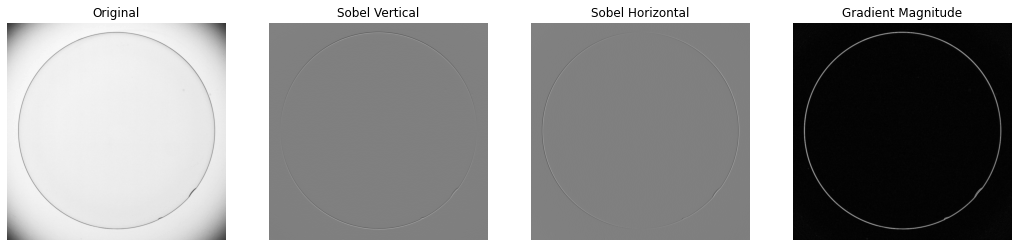

In [10]:
# Question 03

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("contact_lens.tif", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype = np.float32)
img_x = cv.filter2D(img, -1, sobel_v)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float')
img_y = cv.filter2D(img, -1, sobel_h)

img_grad = np.sqrt(img_x**2+img_y**2)

fig, ax = plt.subplots(1,4 , sharex = 'all' , sharey = 'all', figsize=(18,18))
ax[0].imshow(img,cmap= 'gray',vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img_x,cmap= 'gray',vmin=-1020, vmax=1020)
ax[1].set_title('Sobel Vertical')
ax[2].imshow(img_y,cmap= 'gray',vmin=-1020, vmax=1020)
ax[2].set_title('Sobel Horizontal')
ax[3].imshow(img_grad,cmap= 'gray')
ax[3].set_title('Gradient Magnitude')

for i in range(4):
        ax[i].axis('off')

plt.show()


DescribeResult(nobs=335830, minmax=(-91.48576, 88.82602), mean=0.00022629107, variance=13.914802, skewness=-0.24943084088267842, kurtosis=48.298075929810864)


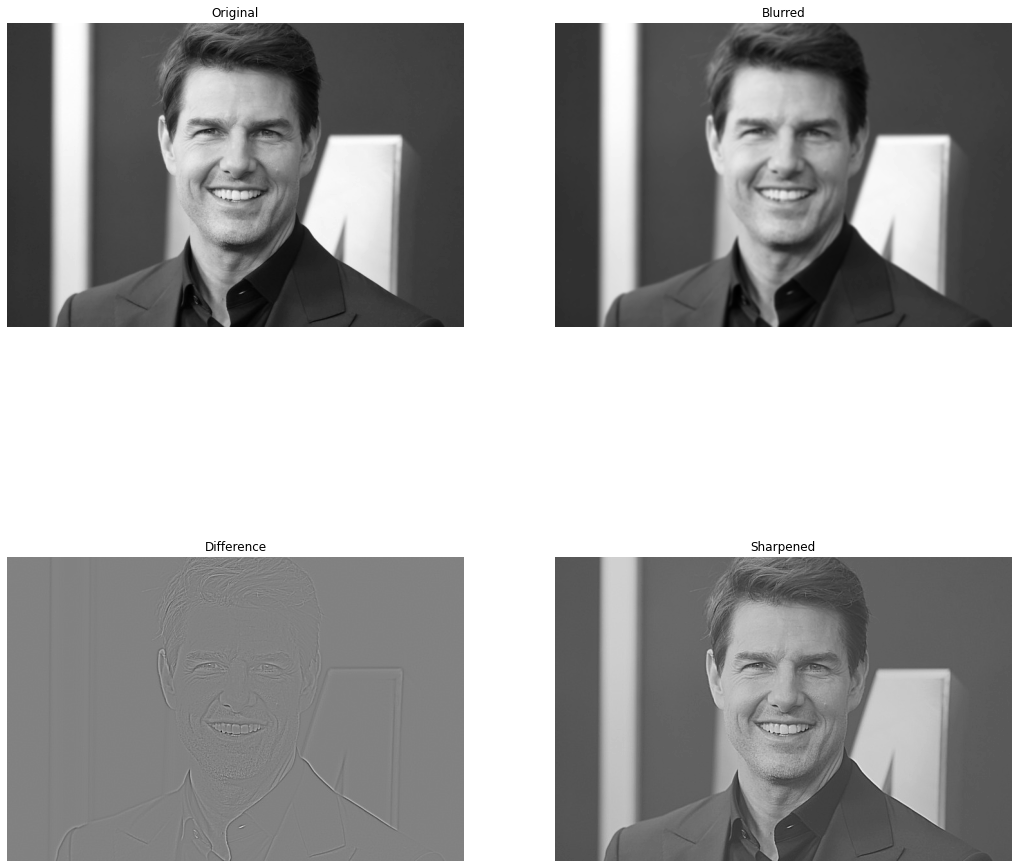

In [11]:
# Question 04

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread("tom.jpg", cv.IMREAD_GRAYSCALE).astype(np.float32)

sigma =2
gaussian_1d = cv.getGaussianKernel(5,sigma)
blurred = cv.sepFilter2D(img , -1 , gaussian_1d, gaussian_1d, anchor=(-1,-1),delta=0, borderType = cv.BORDER_REPLICATE)
diff = img.astype('float32')-blurred.astype('float32')

sharpned = cv.addWeighted(img.astype(np.float32),1.0,diff, 1.5,0)

print(stats.describe(diff.ravel()))

fig, ax = plt.subplots(2, 2 , sharex = 'all' , sharey = 'all', figsize=(18,18))
ax[0,0].imshow(img,cmap= 'gray')
ax[0,0].set_title('Original')
ax[0,1].imshow(blurred,cmap= 'gray')
ax[0,1].set_title('Blurred')
ax[1,0].imshow(diff+125 ,cmap= 'gray')
ax[1,0].set_title('Difference')
ax[1,1].imshow(sharpned,cmap= 'gray')
ax[1,1].set_title('Sharpened')
for i in range(2):
    for j in range(2):
        ax[i,j].axis('off')
plt.show()